In [1]:
import pandas
import matplotlib.pyplot as plt
import math
import numpy as np
import sqlite3 as sql

In [4]:
data = pandas.read_csv("./data/SalaryPrediction.csv")

## Which league pays its players the best?

In [5]:
footballer_wages = data.sort_values(by="Wage")[::-1]
leagues = set()
for index, row in data.iterrows():
    leagues.add(row["League"])
average_wages = []
for league in leagues:
    players_in_league = data.loc[data['League']==league]
    average_wage = round(sum([int(x.replace(',','')) for x in players_in_league['Wage']])/len(players_in_league))
    average_wages.append(average_wage)
    print(league)
    print(f"Average wage: €{average_wage}")



Ligue 1 Uber Eats
Average wage: €1237427
Bundesliga
Average wage: €1405219
Premier League
Average wage: €2335982
La Liga
Average wage: €1520235
Serie A
Average wage: €1336126
Primiera Liga
Average wage: €194827


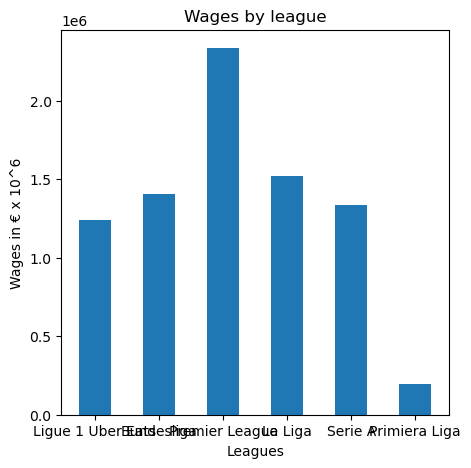

In [6]:
fig = plt.figure(figsize = (5, 5))
plt.bar(list(leagues), average_wages, width=0.5)
plt.title('Wages by league')
plt.xlabel("Leagues")
plt.ylabel("Wages in € x 10^6")
plt.show()

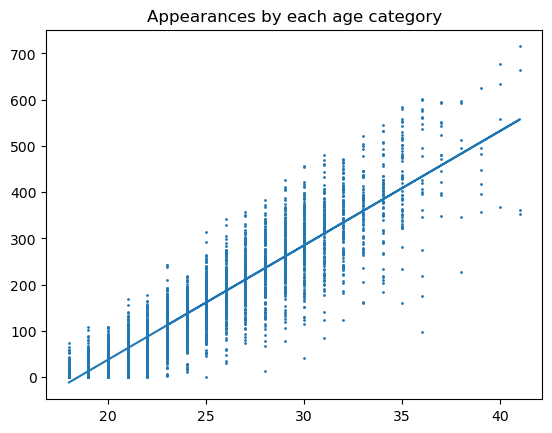

In [7]:
appearences = np.array([int(x) for x in data["Apps"]])
ages = np.array([int(x) for x in data["Age"]])
plt.scatter(ages, appearences, s=1)
plt.title("Appearances by each age category")
m, c = np.polyfit(ages, appearences, 1)
plt.plot(ages, m*ages + c)

In [8]:
db = sql.connect("./data/european_database.sqlite")
db_cursor = db.cursor()

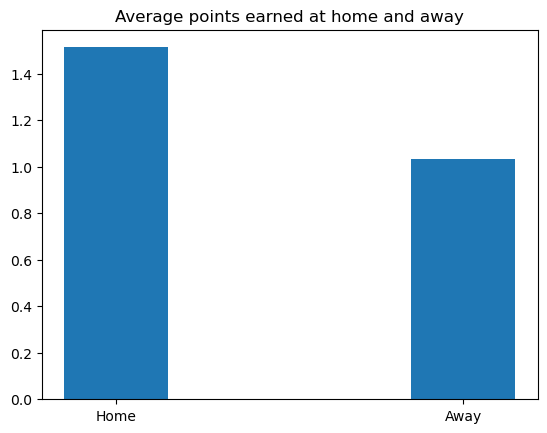

In [9]:
matches = db_cursor.execute("SELECT * FROM matchs").fetchall()
teams = set()
team_points_home = {}
team_points_away = {}
WIN = 3
DRAW = 1
LOSS = 0
for match in matches:
    team_points_home[match[2]] = [0, 0]
    team_points_away[match[3]] = [0, 0]

for match in matches:
    if match[6] == "H":
        team_points_home[match[2]][0] += WIN
        team_points_home[match[2]][1] += 1
        team_points_away[match[3]][0] += LOSS
        team_points_away[match[3]][1] += 1

    elif match[6] == "A":
        team_points_home[match[2]][0] += LOSS
        team_points_home[match[2]][1] += 1
        team_points_away[match[3]][0] += WIN
        team_points_away[match[3]][1] += 1
    elif match[6] == "D":
        team_points_home[match[2]][0] += DRAW
        team_points_home[match[2]][1] += 1
        team_points_away[match[3]][0] += DRAW
        team_points_away[match[3]][1] += 1
count_home = 0
count_away = 0
home_sum = 0
away_sum = 0
for team, points in team_points_away.items():
    count_away += 1
    away_sum +=  points[0] / points[1]
for team, points in team_points_home.items():
    count_home += 1
    home_sum += points[0] / points[1]
home_avg = home_sum/count_home
away_avg = away_sum/count_away

bars = np.array(["Home", "Away"])
vals = np.array([home_avg, away_avg])
plt.bar(bars, vals, width=[0.3, 0.3])
plt.title("Average points earned at home and away")
plt.show()